<a href="https://colab.research.google.com/github/Vaishnavilande/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:04<00:00, 52.0MB/s]
100% 163M/163M [00:04<00:00, 38.4MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


## **Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_776.jpg', 'with_mask_2262.jpg', 'with_mask_515.jpg', 'with_mask_2336.jpg', 'with_mask_1895.jpg']
['with_mask_772.jpg', 'with_mask_3097.jpg', 'with_mask_8.jpg', 'with_mask_1708.jpg', 'with_mask_3156.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2258.jpg', 'without_mask_2072.jpg', 'without_mask_1743.jpg', 'without_mask_150.jpg', 'without_mask_2117.jpg']
['without_mask_2638.jpg', 'without_mask_2561.jpg', 'without_mask_2463.jpg', 'without_mask_2563.jpg', 'without_mask_3251.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
#two list are combine
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## **Displaying the Images**

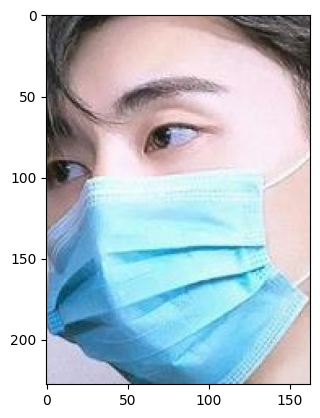

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

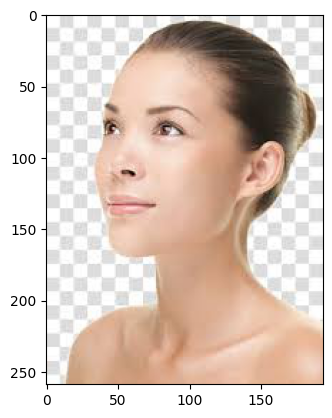

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

## **Image Processing**

1.Resize the Images

2.Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

#empty list
data = []

#loop on with_mask_files list
for img_file in with_mask_files:
   #Image open function of pilo library read the image 
  image = Image.open(with_mask_path + img_file)
  #convert it into standard shape
  image = image.resize((128,128))
  #convert into numpy array(object), it is required here bcz some images of dataset are black and white
  image = image.convert('RGB')
 # convert object into array(numpy)
  image = np.array(image)
  #add the image(numpy array) in the list (data)
  data.append(image)


  without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
data[0]

array([[[ 77, 130, 211],
        [ 89, 144, 228],
        [ 94, 152, 238],
        ...,
        [109, 164, 235],
        [109, 164, 240],
        [107, 163, 242]],

       [[ 78, 131, 207],
        [ 91, 146, 224],
        [ 95, 153, 234],
        ...,
        [117, 162, 251],
        [116, 161, 254],
        [114, 160, 254]],

       [[ 78, 133, 209],
        [ 91, 147, 225],
        [ 96, 154, 235],
        ...,
        [125, 165, 255],
        [123, 163, 255],
        [120, 161, 255]],

       ...,

       [[ 32,  38,  65],
        [ 32,  37,  65],
        [ 16,  22,  50],
        ...,
        [211, 201, 192],
        [211, 201, 192],
        [212, 202, 193]],

       [[ 26,  31,  60],
        [ 28,  33,  62],
        [ 20,  25,  54],
        ...,
        [210, 197, 186],
        [208, 195, 185],
        [208, 194, 184]],

       [[ 33,  38,  68],
        [ 27,  32,  62],
        [ 32,  37,  67],
        ...,
        [197, 181, 168],
        [194, 178, 165],
        [192, 176, 163]]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
#weidth height and color channel
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
#X array contain 7553 array 128 height 128 width 3 color channel
print(X.shape)
#labels
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


## **Train Test Split**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
# scaling the data
#previouslly the the value range between 0 and 255(0 for black and 255 for white) it cointain different matrix for red green blue
# now we want the value between 0 and 1 so for this we divide it by 255

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
X_train[0]

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [165, 132,  86],
        [163, 126,  79],
        [170, 127,  79]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [169, 136,  93],
        [159, 126,  82],
        [160, 124,  81]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 137,  98],
        [150, 121,  81],
        [140, 114,  76]],

       ...,

       [[ 81,  81,  82],
        [ 58,  60,  60],
        [ 59,  59,  59],
        ...,
        [ 59,  66,  64],
        [ 50,  54,  53],
        [ 48,  51,  51]],

       [[ 70,  72,  72],
        [ 63,  65,  65],
        [ 61,  62,  61],
        ...,
        [ 43,  48,  46],
        [ 48,  52,  50],
        [ 45,  51,  49]],

       [[ 61,  64,  63],
        [ 60,  60,  60],
        [ 60,  62,  61],
        ...,
        [ 34,  36,  35],
        [ 41,  46,  44],
        [ 40,  48,  45]]

In [32]:
X_train_scaled[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.64705882, 0.51764706, 0.3372549 ],
        [0.63921569, 0.49411765, 0.30980392],
        [0.66666667, 0.49803922, 0.30980392]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.6627451 , 0.53333333, 0.36470588],
        [0.62352941, 0.49411765, 0.32156863],
        [0.62745098, 0.48627451, 0.31764706]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.5372549 , 0.38431373],
        [0.58823529, 0.4745098 , 0.31764706],
        [0.54901961, 0.44705882, 0.29803922]],

       ...,

       [[0.31764706, 0.31764706, 0.32156863],
        [0.22745098, 0.23529412, 0.23529412],
        [0.23137255, 0

## **Building a Convolutional Neural Networks (CNN)**

In [33]:
#tensorflow(google) and pyteroch(facebook) are widely used library in neural network
#keras either need tensorFlow or pi torch in its back end
import tensorflow as tf
from tensorflow import keras


In [34]:
#2 class with mask and without mask
num_of_classes = 2


model = keras.Sequential()

#adding layer to model
#layer name Conv2D(filter no=25,kernel_size,activation function like relu,sigmoid ,input shape presend only in 1st layer
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
#add maxpooling2d 
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#pass image or data to model as single(one) dimension data
model.add(keras.layers.Flatten())

#all neuron in this layer are coming from the privious layer (128 neuron number can 256,128 ,64or 32 all are power of 2 this is all regarding memory allocation to use memory efficiently) 
#start with a large number of neurons and then decreases
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
#drop some neurons to reduce the problem of overfitting (magnitude 0.5)
model.add(keras.layers.Dropout(0.5))

#output layer (number of neuron=number of classes )
#here we have 2 neuron one give probability of having mask and other give probability of not having mask
#sigmoid is generally used in binary classification problems
# another activation function is soft Max which is used when we have multiclass classification
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
#acc == accuracy

In [36]:
# training the neural network
#validation_split is simillar to test split
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 24ms/step - loss: 0.4701 - acc: 0.7916 - val_loss: 0.2939 - val_acc: 0.8760
Epoch 2/5
170/170 [==============================] - 3s 16ms/step - loss: 0.3000 - acc: 0.8830 - val_loss: 0.2514 - val_acc: 0.8975
Epoch 3/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2544 - acc: 0.8915 - val_loss: 0.2034 - val_acc: 0.9190
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2143 - acc: 0.9154 - val_loss: 0.1661 - val_acc: 0.9223
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1889 - acc: 0.9281 - val_loss: 0.1596 - val_acc: 0.9388


## **Model Evaluation**

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2019 - acc: 0.9206
Test Accuracy = 0.9205824136734009


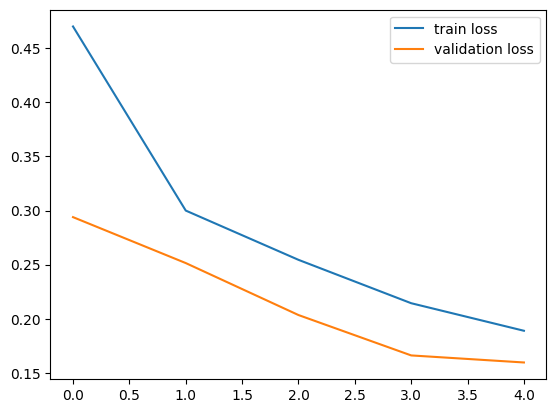

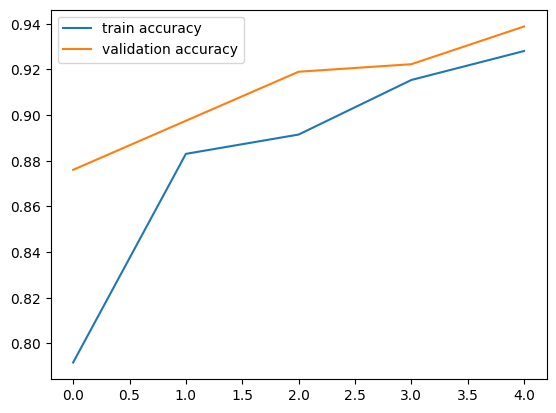

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

## **Predictive System**

Path of the image to be predicted: /content/test.png


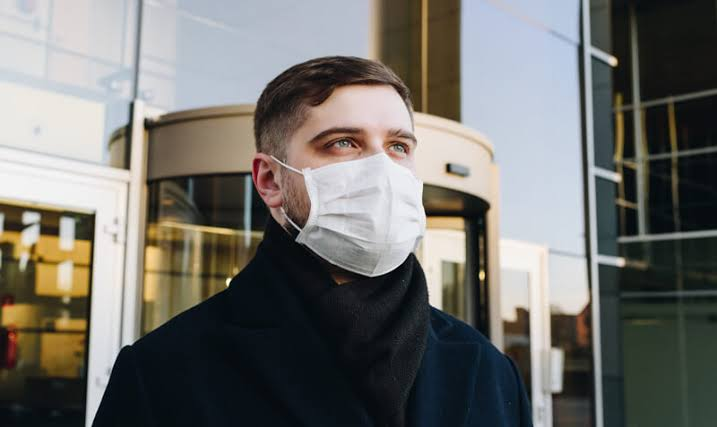

1/1 [==============================] - 0s 41ms/step
[[0.14449157 0.8331422 ]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

#display image
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


#this model give probability of both and select which is large (argmax)  [convert probability value into label value ]
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

### **Thank You.**